In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [38]:
df = pd.read_csv("biomarkers.csv")

X = df.drop(labels="target", axis=1)
sc = StandardScaler()
X_std = sc.fit_transform(X)

y = df["target"]

In [60]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDF = pd.concat([principalDF, y], axis = 1)

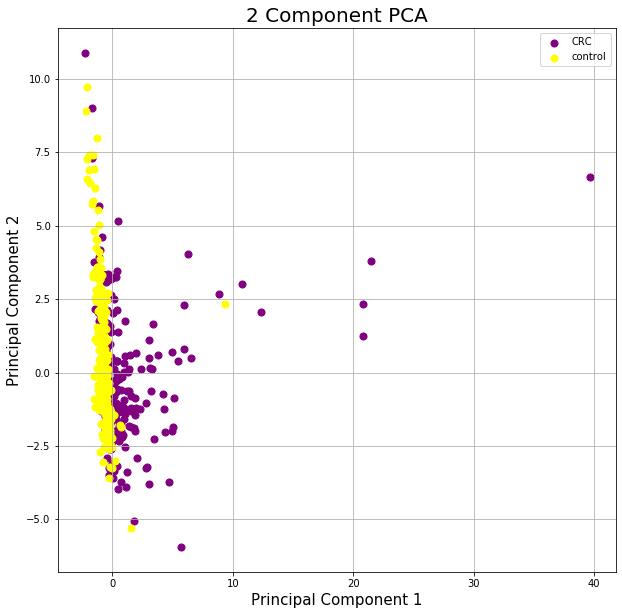

In [63]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['CRC', 'control']
colors = ['purple', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'], 
               finalDF.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

In [42]:
print(pca.explained_variance_ratio_)

[0.05748057 0.0401619 ]


In [67]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)

principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 
                                                                 'principal component 3'])
finalDF = pd.concat([principalDF, y], axis = 1)

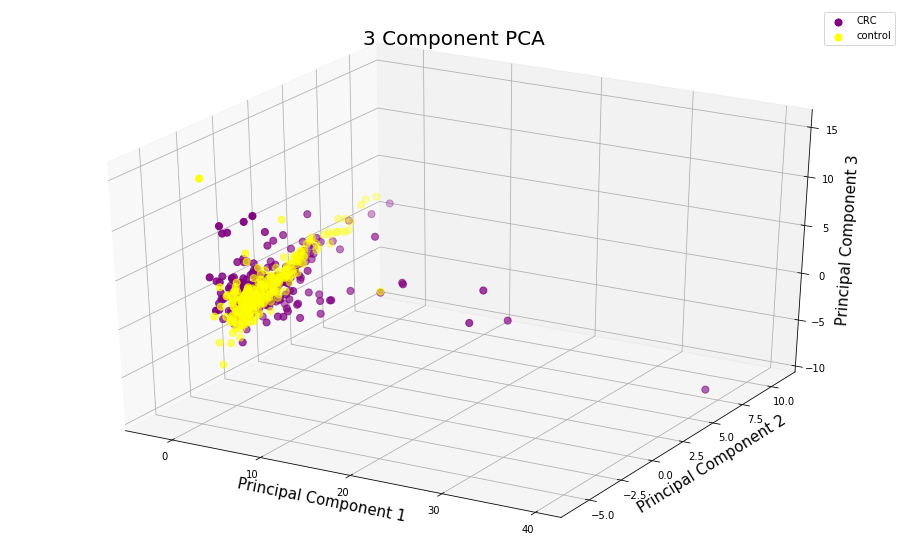

In [68]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')

targets = ['CRC', 'control']
colors = ['purple', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(xs=finalDF.loc[indicesToKeep, 'principal component 1'], 
               ys=finalDF.loc[indicesToKeep, 'principal component 2'],
               zs=finalDF.loc[indicesToKeep, 'principal component 3'],
               c = color, s = 50)

ax.legend(targets)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)
plt.show()

In [52]:
pca = PCA(.95)

principalComponents = pca.fit_transform(X_std)

principalDF = pd.DataFrame(data = principalComponents)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(principalDF, y, test_size=0.2)
model = RandomForestClassifier(n_estimators=250, criterion="gini")

model.fit(X_train, y_train)
yhat = model.predict(X_test)
yhat_probabilities = model.predict_proba(X_test)
yhat_probabilities = [i[1] for i in yhat_probabilities]

print(roc_auc_score(y_test, yhat_probabilities))
print(accuracy_score(y_test, yhat))

0.852526926263463
0.7786885245901639
